In [173]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

In [174]:
def AssetPrice(mu, sigma, r, S0, risk_free):
    dt = 1/252
    prices = np.zeros(252)
    prices[0] = S0
    if(risk_free==1):
        for i in range(1,252):
            Wt = np.random.normal(0,np.sqrt(dt))
            prices[i] = prices[i-1]*np.exp(sigma*Wt + (r - 0.5*sigma*sigma)*dt)

    else:
        for i in range(1,252):
            Wt = np.random.normal(0,np.sqrt(dt))
            prices[i] = prices[i-1]*np.exp(sigma*Wt + (mu - 0.5*sigma*sigma)*dt)

    return prices


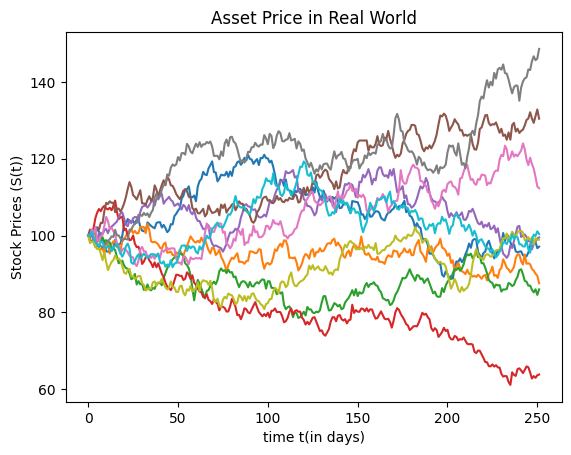

In [175]:

for i in range(10):
    prices = AssetPrice(0.1, 0.2, 0.05, 100, 0)
    plt.plot(range(252), prices)
    plt.xlabel('time t(in days)')
    plt.ylabel('Stock Prices (S(t))')
    plt.title('Asset Price in Real World')
    # print(f"{prices.mean()}, {prices.var()}")

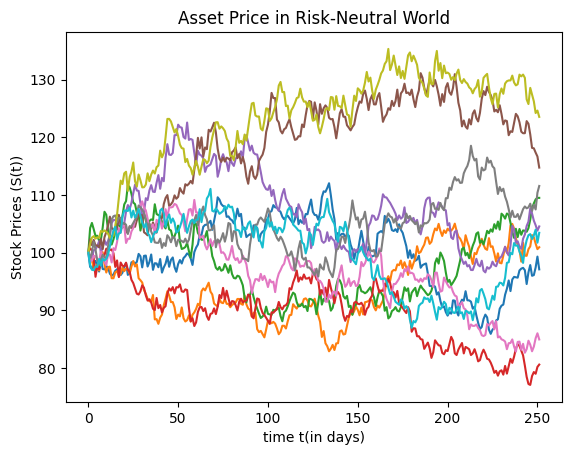

In [176]:
for i in range(10):
    prices = AssetPrice(0.1, 0.2, 0.05, 100, 1)
    plt.plot(range(252), prices)
    plt.xlabel('time t(in days)')
    plt.ylabel('Stock Prices (S(t))')
    plt.title('Asset Price in Risk-Neutral World')


In [112]:
def AsianPrice(prices, r, n, K):
    prices = prices[:n]
    T = n/252

    call_price = max(prices.mean() - K, 0)
    put_price = max(K -prices.mean() , 0)

    return call_price*np.exp(-r*T), put_price*np.exp(-r*T)

In [196]:
call_asians = np.zeros(1000)
put_asians = np.zeros(1000)

for K in [90, 105, 110]:

    for i in range(1000):
        prices = AssetPrice(0.1, 0.2, 0.05, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, K)
    print(f"\n********For K={K}********")
    print(f"Asian Call Option Price:\t\t {call_asians.mean()}")
    print(f"Variance in Asian Call Option Price:\t {call_asians.var()}\n")
    print(f"Asian Put Option Price:\t\t\t {put_asians.mean()}")
    print(f"Variance in Asian Put Option Price:\t {put_asians.var()}")


********For K=90********
Asian Call Option Price:		 10.501213854029563
Variance in Asian Call Option Price:	 51.33875367409586

Asian Put Option Price:			 0.22919816679331653
Variance in Asian Put Option Price:	 1.2155239123143928

********For K=105********
Asian Call Option Price:		 1.82907995850083
Variance in Asian Call Option Price:	 14.556456514070778

Asian Put Option Price:			 5.278799667944051
Variance in Asian Put Option Price:	 30.74392871002232

********For K=110********
Asian Call Option Price:		 0.6781692823790141
Variance in Asian Call Option Price:	 5.12055542656904

Asian Put Option Price:			 9.14470134641387
Variance in Asian Put Option Price:	 46.875212477749244


### Sensitivity Analysis

Text(0.5, 1.0, 'Varying S0 from 50 to 200')

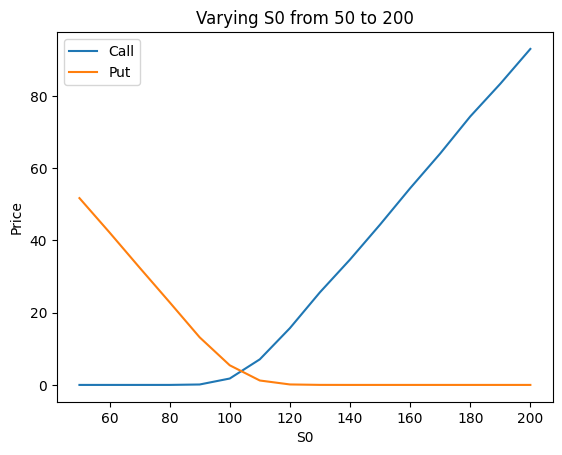

In [184]:
calls = []
puts = []
for S in range(50,201,10):
    for i in range(1000):
        prices = AssetPrice(0.1, 0.2, 0.05, S, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, 105)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.xlabel('S0')
plt.ylabel('Price')

plt.plot(range(50,201,10), calls,label='Call')
plt.plot(range(50,201,10), puts, label='Put')
plt.legend()
plt.title('Varying S0 from 50 to 200')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Varying K from 50 to 200')

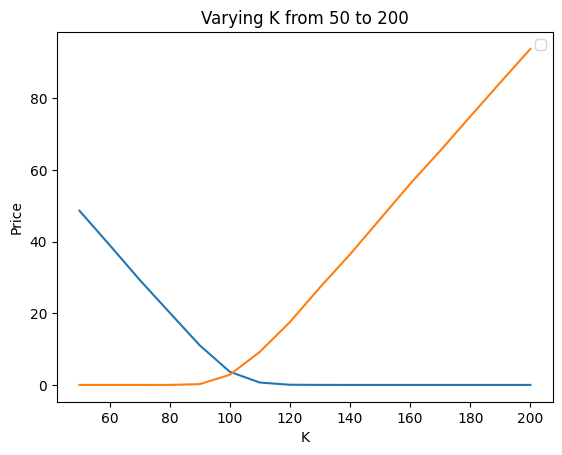

In [200]:
calls = []
puts = []
for S in range(50,201,10):
    for i in range(1000):
        prices = AssetPrice(0.1, 0.2, 0.05, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, S)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.plot(range(50,201,10), calls)
plt.plot(range(50,201,10), puts)
plt.xlabel('K')
plt.ylabel('Price')
plt.legend()
plt.title('Varying K from 50 to 200')

Text(0.5, 1.0, 'Varying r (risk-free rate) from 0.01 to 1')

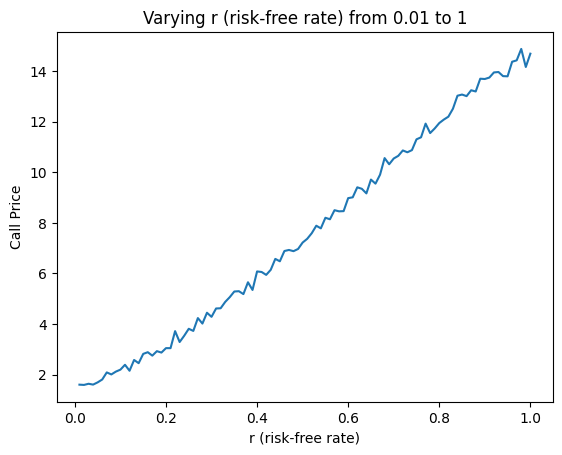

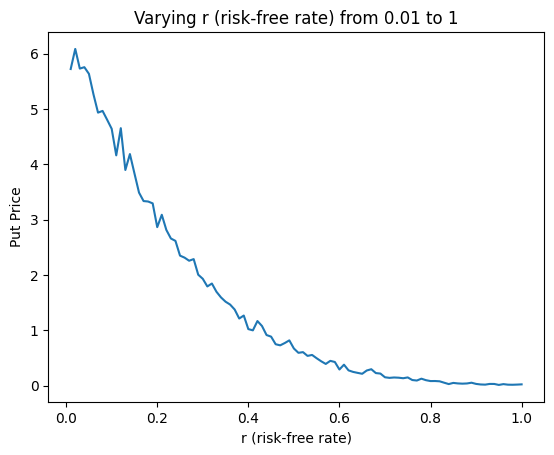

In [193]:
calls = []
puts = []
rs = np.linspace(0.01, 1, 100)
for r in rs:
    for i in range(1000):
        prices = AssetPrice(0.1, 0.2, r, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, r, 126, 105)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.figure()
plt.plot(rs, calls, label='Call')
plt.xlabel('r (risk-free rate)')
plt.ylabel('Call Price')
plt.title('Varying r (risk-free rate) from 0.01 to 1')

plt.figure()
plt.plot(rs, puts, label='Put')
plt.xlabel('r (risk-free rate)')
plt.ylabel('Put Price')
# plt.legend()
plt.title('Varying r (risk-free rate) from 0.01 to 1')

Text(0.5, 1.0, 'Varying sigma from 0.01 to 1')

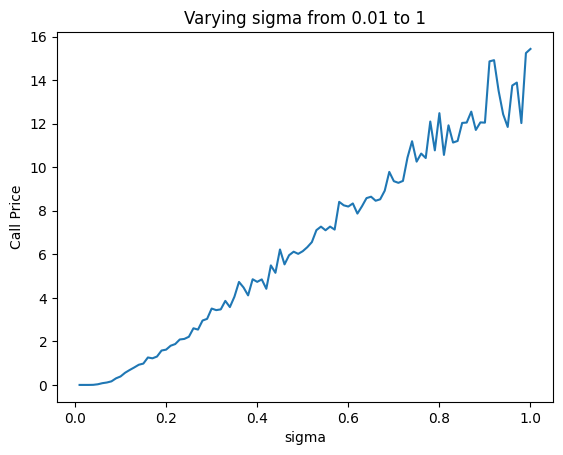

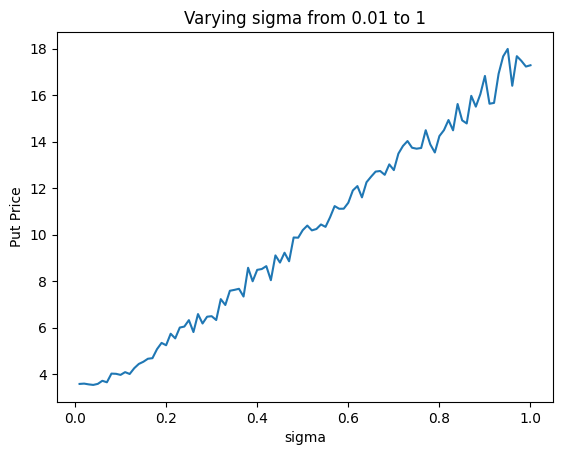

In [194]:
calls = []
puts = []
rs = np.linspace(0.01, 1, 100)
for r in rs:
    for i in range(1000):
        prices = AssetPrice(0.1, r, 0.05, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, 105)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.figure()
plt.plot(rs, calls)
plt.xlabel('sigma')
plt.ylabel('Call Price')
plt.title('Varying sigma from 0.01 to 1')

plt.figure()
plt.plot(rs, puts)
plt.xlabel('sigma')
plt.ylabel('Put Price')
plt.title('Varying sigma from 0.01 to 1')

### Q2

In [159]:
def RV_AssetPrice(mu, sigma, r, S0, risk_free):
    dt = 1/252
    prices = np.zeros(252)
    prices[0] = S0
    prices[1] = S0
    if(risk_free==1):
        for i in range(1,251,2):
            Wt = np.random.normal(0,np.sqrt(dt))
            prices[i] = prices[i-1]*np.exp(sigma*Wt + (r - 0.5*sigma*sigma)*dt)
            prices[i+1] = prices[i-1]*np.exp(-sigma*Wt + (r - 0.5*sigma*sigma)*dt)

    else:
        for i in range(1,251,2):
            Wt = np.random.normal(0,np.sqrt(dt))
            prices[i] = prices[i-1]*np.exp(sigma*Wt + (r - 0.5*sigma*sigma)*dt)
            prices[i+1] = prices[i-1]*np.exp(-sigma*Wt + (r - 0.5*sigma*sigma)*dt)

    return prices

In [197]:
call_asians = np.zeros(1000)
put_asians = np.zeros(1000)

for K in [90, 105, 110]:

    for i in range(1000):
        prices = RV_AssetPrice(0.1, 0.2, 0.05, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, K)
    print(f"\n********For K={K}********")
    print(f"Asian Call Option Price:\t\t {call_asians.mean()}")
    print(f"Variance in Asian Call Option Price:\t {call_asians.var()}\n")
    print(f"Asian Put Option Price:\t\t\t {put_asians.mean()}")
    print(f"Variance in Asian Put Option Price:\t {put_asians.var()}")


********For K=90********
Asian Call Option Price:		 10.636879950223445
Variance in Asian Call Option Price:	 26.227300695221192

Asian Put Option Price:			 0.037094013839311324
Variance in Asian Put Option Price:	 0.09422722247740392

********For K=105********
Asian Call Option Price:		 0.6960542660180179
Variance in Asian Call Option Price:	 3.822821293388878

Asian Put Option Price:			 5.24268621507906
Variance in Asian Put Option Price:	 19.793135852808234

********For K=110********
Asian Call Option Price:		 0.15502216862825746
Variance in Asian Call Option Price:	 0.6012541851665542

Asian Put Option Price:			 8.808382327701498
Variance in Asian Put Option Price:	 25.596156210682135


### Sensitvity Analysis (With Variance Reduction)

Text(0.5, 1.0, 'Varying S0 from 50 to 200')

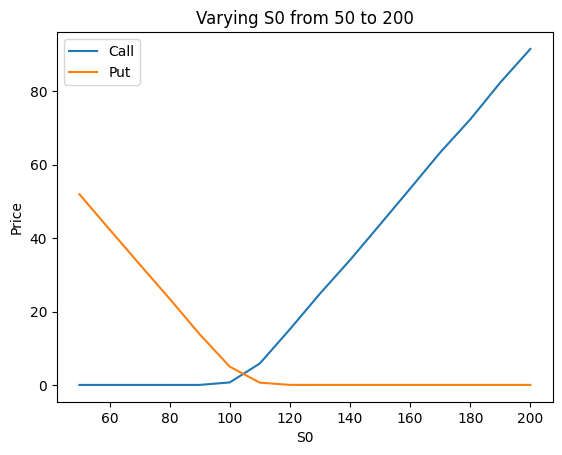

In [198]:
calls = []
puts = []
for S in range(50,201,10):
    for i in range(1000):
        prices = RV_AssetPrice(0.1, 0.2, 0.05, S, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, 105)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.xlabel('S0')
plt.ylabel('Price')

plt.plot(range(50,201,10), calls,label='Call')
plt.plot(range(50,201,10), puts, label='Put')
plt.legend()
plt.title('Varying S0 from 50 to 200')

Text(0.5, 1.0, 'Varying K from 50 to 200')

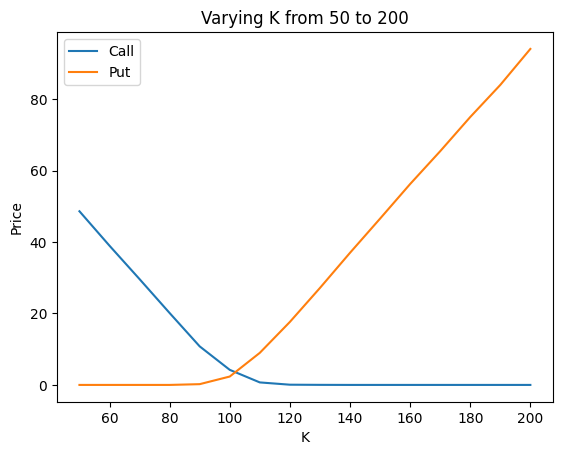

In [202]:
calls = []
puts = []
for S in range(50,201,10):
    for i in range(1000):
        prices = AssetPrice(0.1, 0.2, 0.05, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, S)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.plot(range(50,201,10), calls, label='Call')
plt.plot(range(50,201,10), puts, label='Put')
plt.xlabel('K')
plt.ylabel('Price')
plt.legend()
plt.title('Varying K from 50 to 200')

Text(0.5, 1.0, 'Varying r (risk-free rate) from 0.01 to 1')

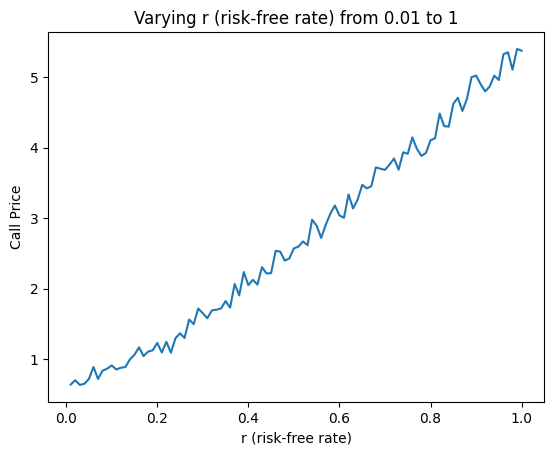

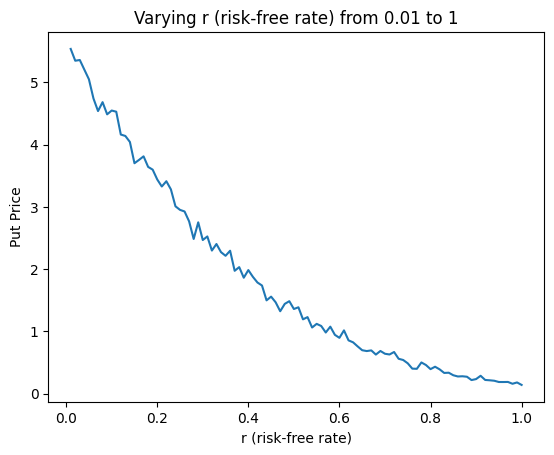

In [203]:
calls = []
puts = []
rs = np.linspace(0.01, 1, 100)
for r in rs:
    for i in range(1000):
        prices = RV_AssetPrice(0.1, 0.2, r, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, r, 126, 105)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.figure()
plt.plot(rs, calls, label='Call')
plt.xlabel('r (risk-free rate)')
plt.ylabel('Call Price')
plt.title('Varying r (risk-free rate) from 0.01 to 1')

plt.figure()
plt.plot(rs, puts, label='Put')
plt.xlabel('r (risk-free rate)')
plt.ylabel('Put Price')
# plt.legend()
plt.title('Varying r (risk-free rate) from 0.01 to 1')

Text(0.5, 1.0, 'Varying sigma from 0.01 to 1')

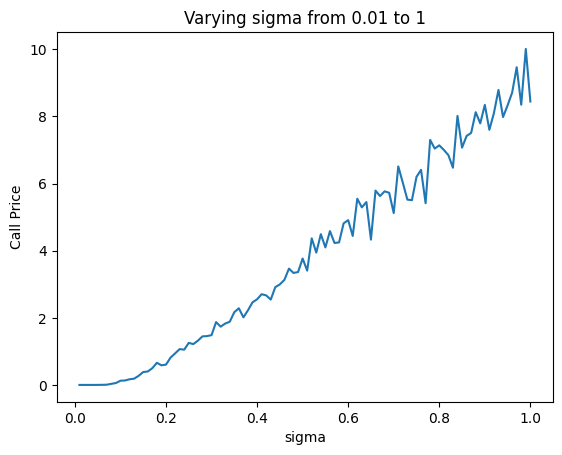

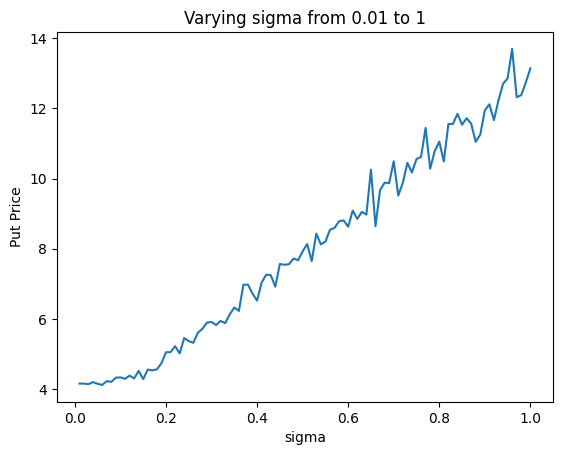

In [204]:
calls = []
puts = []
rs = np.linspace(0.01, 1, 100)
for r in rs:
    for i in range(1000):
        prices = RV_AssetPrice(0.1, r, 0.05, 100, 1)
        call_asians[i], put_asians[i] = AsianPrice(prices, 0.1, 126, 105)
    calls.append(call_asians.mean())
    puts.append(put_asians.mean())

plt.figure()
plt.plot(rs, calls)
plt.xlabel('sigma')
plt.ylabel('Call Price')
plt.title('Varying sigma from 0.01 to 1')

plt.figure()
plt.plot(rs, puts)
plt.xlabel('sigma')
plt.ylabel('Put Price')
plt.title('Varying sigma from 0.01 to 1')